In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
#statistical infermation
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Categorical columns**
1.Survived
2.Pclass
3.Sex
4.SibSp
5.Parch
6.Embarked
**Neumarical columns**
1.Age
2.Fare
3.PassengerId
**Mixed columns**
1.Name
2.Ticket
3.Cabin




In [ ]:
#datatype infermation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()  ##missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#conclusion
# 1. Missing values  in Age,Cabin and Embarked columns.
# 2. More than 70 percent values are missing in Cabin column,will drop the Cabin column.

In [ ]:
# Dropping Cabin column.
df.drop(columns=["Cabin"],inplace=True)

In [ ]:
# Replacing the missing values with mean in Age column.
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [ ]:
# imputing missing values in Embarked column
df["Embarked"].fillna("S",inplace=True)

In [ ]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Conclusion
## No missing values in dataset.

In [ ]:
# changing datatype into proper datatype for perticular columns by using astype.
df["Survived"]=df["Survived"].astype("category")
df["Pclass"]=df["Pclass"].astype("Category")
df["Sex"]=df["Sex"].astype("Category")
df["Age"]=df["Age"].astype("int")
df["Embarked"]=df["Embarked"].astype("category")

In [ ]:
df = df.astype({"Pclass":'category',"Sex":'category',"Survived":'category',"Embarked":'category'})

In [ ]:
df = df.astype({"Age":'int'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [ ]:
#Conclusion
#1. Converted in to proper datatype.
#2. Less memory used compare to previous.

In [ ]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
#conclusion
#1. count of number of people travelled.In this 608 members travelled alone,209 members had one relationship with sibling or spouse,
# 28 members had two relations like that...

In [ ]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
#Conclusion
#1. In this,678 members travelled without parent and child relations.
#2. 118 members had one parent and one child like that.

In [ ]:
c= pd.crosstab(df["Sex"],df["Pclass"])
print(c)

Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


out of 891 62 percent of people died in the accident


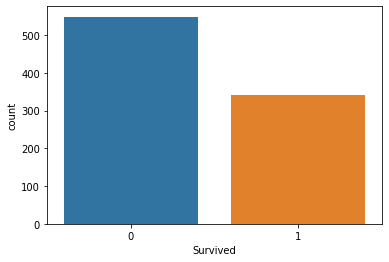

In [ ]:
# Univariate analysis
##categorical columns
sns.countplot(df["Survived"])
death_percent=round((df["Survived"].value_counts().values[0]/891)*100)
print("out of 891 {} percent of people died in the accident".format(death_percent))

In [ ]:
#Conclusion
#1.out of 891 people,only 38% people survived.
#2.death percentage is higher than the survived percentage.

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


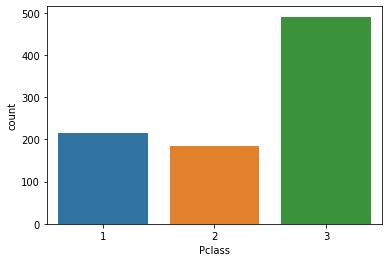

In [ ]:
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(df["Pclass"])
#Pclass3 crowd class

In [ ]:
#Conclusion
#1.More people are in Pclass3 compared to Pclass1 and Pclass2.
#2.Pclass3 Fare is lesser than the remaining classes.So,people are more intrested to buy the Pclass3 tickets.
#3.In Pclass1 and Pclass2,people are uniformly distributed.Because Fare between Pclass1 and Pclass2 is very less.

male      64.758698
female    35.241302
Name: Sex, dtype: float64


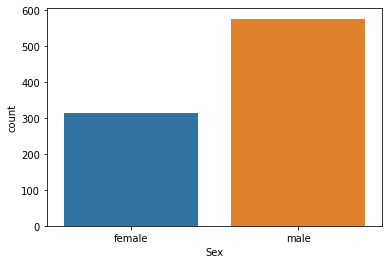

In [ ]:
print((df["Sex"].value_counts()/891)*100)
sns.countplot(df["Sex"])

In [ ]:
#Conclusion
#1.male percentage is higher than female percentage.
#2.Otherthan passengers may be most of the workers are male only.
#3.Also male are travelled more for business purposes.

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


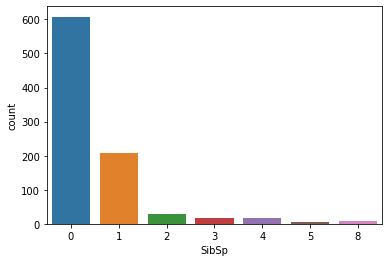

In [ ]:
print((df["SibSp"].value_counts()/891)*100)
sns.countplot(df["SibSp"])

In [ ]:
#Conclusion
#1.Travelled alone percentage is higher than the travelled with sibling and spouse relations.

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


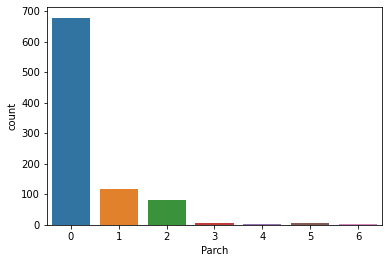

In [ ]:
print((df["Parch"].value_counts()/891)*100)
sns.countplot(df["Parch"])

In [ ]:
#Conclusion
#1.Travelled alone percentage is higher than the travelled with parents and child relations.

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64


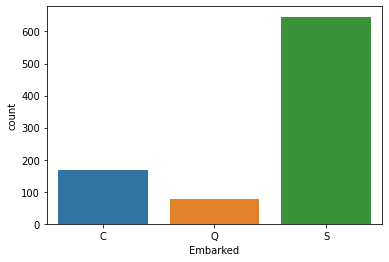

In [ ]:
print((df["Embarked"].value_counts()/891)*100)
sns.countplot(df["Embarked"])

In [ ]:
#Conclusion
#1.Most of the people from 'S' city compared with 'C' and 'Q' city.

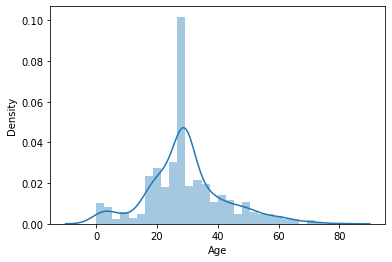

In [ ]:
#neumarical columns
sns.distplot(df["Age"])

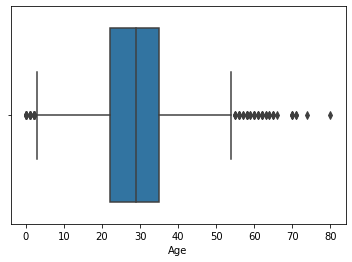

In [ ]:
sns.boxplot(df["Age"])

In [ ]:
#Conclusion
#1.age is normal distribution.
#2.may be outliers present above 65 age people.

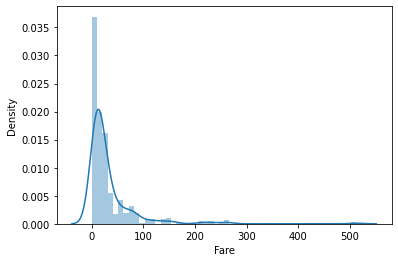

In [ ]:
sns.distplot(df["Fare"])

Ttest_1sampResult(statistic=-40.723268607665425, pvalue=1.6247703939517725e-205)


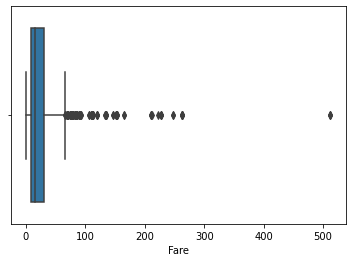

In [ ]:
print(stats.ttest_1samp(df["Fare"],popmean=100))
sns.boxplot(df["Fare"])

In [ ]:
#Conclusion
#1. lot of outliers at right side.
#2. lot of people had cheaper tickets.
#3. Based on pvalue,we rejected the independence.so,Fare is dependent column.

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


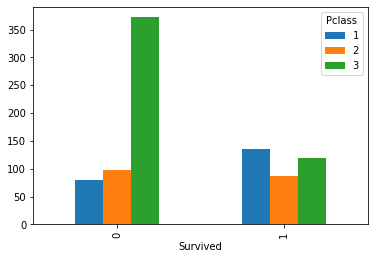

In [ ]:
#Multivariate analysis
#Relationship between two categorical data.
c= pd.crosstab(df["Survived"],df["Pclass"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")

In [ ]:
#Conclusion
#1. More people died in pclass3 and more people survived in pclass1.

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  219


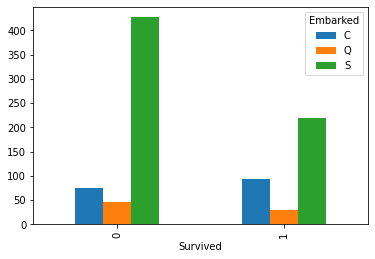

In [ ]:
c= pd.crosstab(df["Survived"],df["Embarked"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")

In [ ]:
#Conclusion
#1. Most of the people are from S city only.
#2. so,more people died and more people survived from S city.

Sex       female  male
Survived              
0             81   468
1            233   109


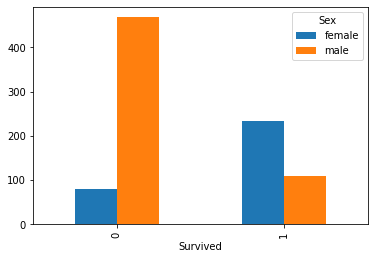

In [ ]:
c= pd.crosstab(df["Survived"],df["Sex"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")

In [ ]:
#Conclusion
#1. Males are died more compared with females and females are survived more comapred to males.
#2. maybe males are responsible for saving the females life.

SibSp       0    1   2   3   4  5  8
Survived                            
0         398   97  15  12  15  5  7
1         210  112  13   4   3  0  0


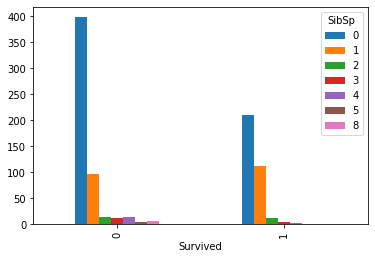

In [ ]:
c= pd.crosstab(df["Survived"],df["SibSp"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")

In [ ]:
#Conclusion
#1. people travelled alone are survived more compared with sibsp relations.

Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


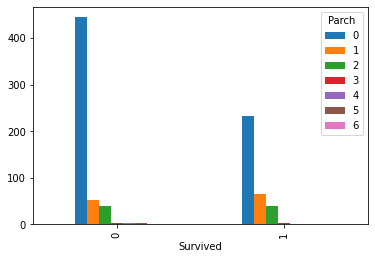

In [ ]:
c= pd.crosstab(df["Survived"],df["Parch"])
print(c)
stats.chi2_contingency(c)
c.plot(kind="bar")

In [ ]:
#Conclusion
#1. people travelled alone are survived more compared with Parch relations.

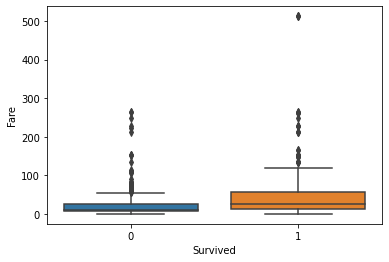

F_onewayResult(statistic=63.03076422804448, pvalue=6.120189341921873e-15)

In [ ]:
#Relationship between categorical and neumarical data.
stats.ttest_ind(a=df["Survived"],b=df["Fare"],equal_var=True)
sur_0=df[df["Survived"]==0]["Fare"]
sur_1=df[df["Survived"]==1]["Fare"]

sns.boxplot(x='Survived',y="Fare",data=df)
plt.show()
stats.f_oneway(sur_0,sur_1)


In [ ]:
#Conclusion
#1. Based on the Pvalue,we will reject the independence.
#2. so,Fare depends on the howmany people survived.
#3. people with cheaper fare,they wont survive. 

[3, 1, 2]
Categories (3, int64): [1, 2, 3]


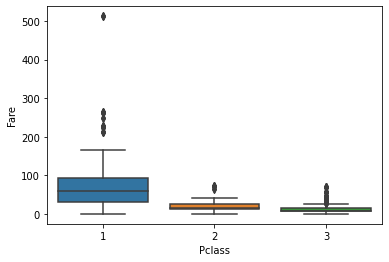

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

In [ ]:
#Anova test for group of classes
stats.ttest_ind(a=df["Pclass"],b=df["Fare"],equal_var=True)
print(df.Pclass.unique())       
P1 = df[df['Pclass'] == 1]['Fare']
P2 = df[df['Pclass'] == 2]['Fare']
P3 = df[df['Pclass'] == 3]['Fare']
sns.boxplot(x='Pclass',y="Fare",data=df)
plt.show()
stats.f_oneway(P1,P2,P3)

In [ ]:
#Conclusion
#1. Bases on pvalue,we will reject the independence.
#2. Fare depends on the Pclass.

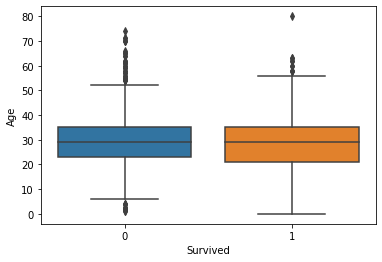

F_onewayResult(statistic=4.106575915971048, pvalue=0.04301487558219244)

In [ ]:
sur_0=df[df["Survived"]==0]["Age"]
sur_1=df[df["Survived"]==1]["Age"]

sns.boxplot(x='Survived',y="Age",data=df) 
plt.show()
stats.f_oneway(sur_0,sur_1)

In [ ]:
#Conclusion
#1. pvalue less than 0.05.so we will reject the independence.
#2. Age column depends on the Survived column.

Ttest_indResult(statistic=-1.5456008741552811, pvalue=0.12237874942697213)


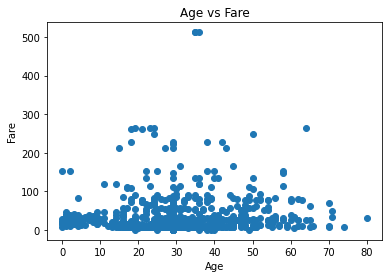

In [ ]:
#Relationship between two neumarical data.
print(stats.ttest_ind(a=df["Age"],b=df["Fare"],equal_var=True))
m = df["Age"].values
n = df["Fare"].values
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age vs Fare")
plt.scatter(m,n)

In [ ]:
#Conclusion
#1.Pvalue greater than 0.05 that is fail to reject the independence.
#2.Age and Fair are independent of each other.There is no relationship between Age and Fair.

In [ ]:
import plotly.express as px
d1=df.groupby("Pclass")['Fare'].mean()
print(d1)
fig=px.bar(df.groupby("Pclass")['Fare'].mean(),y="Fare")
fig


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64
